In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pathlib import Path
import xarray as xr
import tensorflow as tf
from shared.models import *
from shared.utilities import *
from shared.training import train_and_evaluate, split_data_on_participants, k_fold_cross_validate, get_compile_kwargs
from shared.normalization import *
from shared.generators import *
from shared.visualization import *
from mne.viz import plot_topomap
from mne.io import read_info
from alibi.explainers import IntegratedGradients
# tf.compat.v1.disable_v2_behavior()
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.experimental.output_all_intermediates(True)
%env TF_FORCE_GPU_ALLOW_GROWTH=true
%env TF_GPU_ALLOCATOR=cuda_malloc_async

2023-10-23 17:10:44.508085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 17:10:45.366033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


env: TF_FORCE_GPU_ALLOW_GROWTH=true
env: TF_GPU_ALLOCATOR=cuda_malloc_async


In [2]:
data_path = Path("data/sat1/split_stage_data.nc")

data = xr.load_dataset(data_path)
set_global_seed(42)
train_data, val_data, test_data = split_data_on_participants(data, 60, norm_dummy)

In [3]:
tf.keras.backend.clear_session()
positions = read_info(Path("data/sat1/preprocessed/processed_0001_epo.fif"))
model = tf.keras.models.load_model("models/gru")
# model.trainable = False

2023-10-23 17:10:49.944685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 17:10:49.976629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 17:10:49.976718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 17:10:49.979230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-23 17:10:49.979306: I tensorflow/compile

In [4]:
ig = IntegratedGradients(
    model,
    layer=None,
    target_fn=None,
    method="gausslegendre",
    n_steps=50,
    internal_batch_size=32,
)

In [6]:
tf.keras.backend.clear_session()
test_data = add_gradient_analysis(test_data, ig)

Batch: 0/124
Batch: 1/124
Batch: 2/124
Batch: 3/124
Batch: 4/124
Batch: 5/124
Batch: 6/124
Batch: 7/124
Batch: 8/124
Batch: 9/124
Batch: 10/124
Batch: 11/124
Batch: 12/124
Batch: 13/124
Batch: 14/124
Batch: 15/124
Batch: 16/124
Batch: 17/124
Batch: 18/124
Batch: 19/124
Batch: 20/124
Batch: 21/124
Batch: 22/124
Batch: 23/124
Batch: 24/124
Batch: 25/124
Batch: 26/124
Batch: 27/124
Batch: 28/124
Batch: 29/124
Batch: 30/124
Batch: 31/124
Batch: 32/124
Batch: 33/124
Batch: 34/124
Batch: 35/124
Batch: 36/124
Batch: 37/124
Batch: 38/124
Batch: 39/124
Batch: 40/124
Batch: 41/124
Batch: 42/124
Batch: 43/124
Batch: 44/124
Batch: 45/124
Batch: 46/124
Batch: 47/124
Batch: 48/124
Batch: 49/124
Batch: 50/124
Batch: 51/124
Batch: 52/124
Batch: 53/124
Batch: 54/124
Batch: 55/124
Batch: 56/124
Batch: 57/124
Batch: 58/124
Batch: 59/124
Batch: 60/124
Batch: 61/124
Batch: 62/124
Batch: 63/124
Batch: 64/124
Batch: 65/124
Batch: 66/124
Batch: 67/124
Batch: 68/124
Batch: 69/124
Batch: 70/124
Batch: 71/124
Ba

In [7]:
test_data

<xarray.Dataset>
Dimensions:      (index: 3984, samples: 147, channels: 30)
Coordinates:
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 140 141 142 143 144 145 146
    stim         (index) float64 1.0 2.0 2.0 2.0 1.0 1.0 ... 2.0 1.0 1.0 1.0 2.0
    resp         (index) object 'resp_left' 'resp_right' ... 'resp_right'
    rt           (index) float64 0.755 0.368 0.561 0.442 ... 0.47 0.666 0.416
    cue          (index) object 'AC' 'SP' 'SP' 'AC' 'AC' ... 'AC' 'SP' 'AC' 'SP'
    movement     (index) object 'stim_left' 'stim_right' ... 'stim_right'
    trigger      (index) object 'AC/stim_left/resp_left' ... 'SP/stim_right/r...
  * index        (index) object MultiIndex
  * participant  (index) object '0005' '0024' '0014' ... '0024' '0005' '0014'
  * epochs       (index) int64 82 162 16 147 15 85 169 ... 53 18 187 175 78 102
  * labels       (index) object 'pre-attentive' 'decision' ... 'decision'
Data variables:
    data         (index, samples, channels) float64 7.687 4.013 ... 999.0 999.0
    analysis     (index, samples, channels) float64 0.006133 0.003616 ... 0.0

In [9]:
test_set = test_data
nan_indices = np.isnan(test_set.data.where(test_set.data != MASKING_VALUE))
test_set['analysis'] = test_set.analysis.where(~nan_indices, 0)

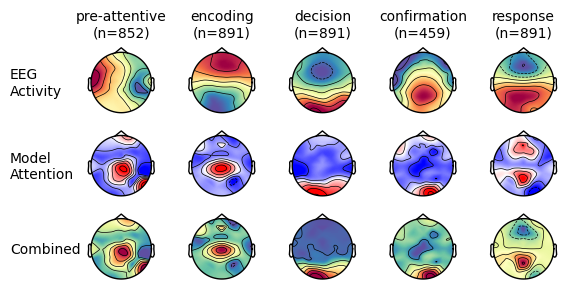

In [14]:
plot_max_activation_per_label(test_data, positions)

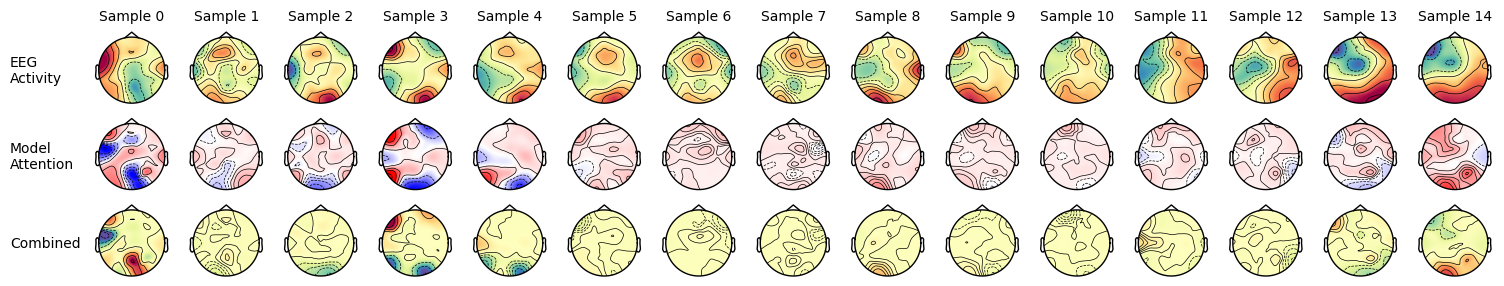

In [16]:
plot_single_trial_activation(test_data.isel(index=3), positions)

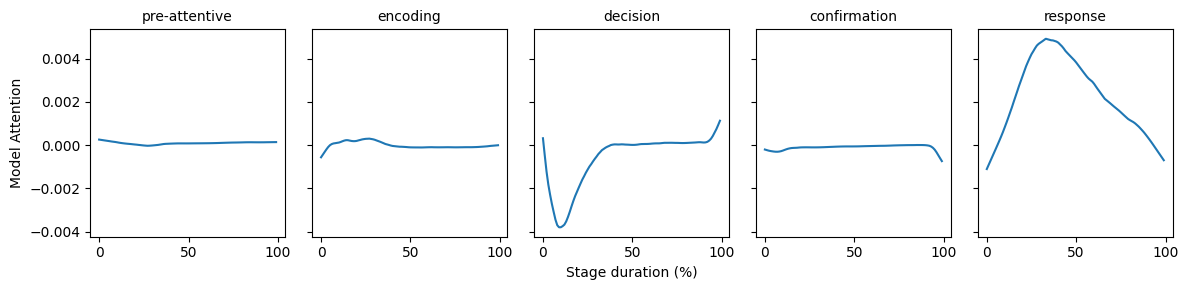

In [17]:
f, ax = plt.subplots(
    nrows=1, ncols=len(SAT1_STAGES_ACCURACY), figsize=(12, 3), sharey=True, sharex=True
)

time_points = np.linspace(0, 100, 100)
for i, label in enumerate(SAT1_STAGES_ACCURACY):
    subset = test_data.sel(labels=label)
    nan_indices = np.isnan(subset.data.where(subset.data != 999)).argmax(
        dim=["samples", "channels"]
    )
    interpolated = []
    for sample, nan_index in zip(subset.analysis, nan_indices["samples"]):
        sequence = sample.mean(dim="channels")[0 : nan_index.item()]
        if len(sequence) == 0:
            continue
        origin_time_points = np.linspace(0, 100, num=len(sequence))
        interpolated_sequence = np.interp(time_points, origin_time_points, sequence)
        interpolated.append(interpolated_sequence)
    ax[i].plot(np.mean(interpolated, axis=0))
    ax[i].set_title(f"{label}", fontsize=10)
# ax[2].text(0, -0.005, 'Linear interpolation\nof stage length', va='bottom', ha='center')
ax[0].set_ylabel("Model Attention")
ax[2].set_xlabel("Stage duration (%)")
plt.tight_layout()
plt.show()